# All material ©2019, Alex Siegman

---

## There are a seemingly infinite number of different tools for data visualization in Python. For today, we're going to focus on Matplotlib and Seaborn. 

> Matplotlib is a standard, Python, 2D plotting library (https://matplotlib.org/) <br> 
> Seaborn is also a Python, data visualization library built atop Matplotlib (https://seaborn.pydata.org/)

In [51]:
import matplotlib.pyplot as plt # importing matplotlib.pyplot
import seaborn as sns # importing seaborn
sns.set(style="whitegrid") # just setting some aesthetics
import pandas as pd # importing pandas so we can work with our dataframes
%matplotlib inline 

# "%matplotlib inline" is a "magic function" in the Jupyter notebook. It ultimately means that
# the output of the plotting commands will be displayed within the Jupyter cell 
# below the code itself. 

In [52]:
data = pd.read_csv("SternTech_UserData.csv") # read in our csv 

In [53]:
data.head() # check the first five rows of our csv

,Unnamed: 0,id,company_size,age,sex,clicked_on_ad,ad_type,location,timestamp
0,0,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,MidWest,2018-08-26 06:00:27.124290
1,1,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,SouthWest,2011-06-01 18:54:34.815634
2,2,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,SouthEast,2013-07-16 00:24:47.888180
3,3,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,NorthWest,2010-06-25 12:13:51.369878
4,4,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,US,2010-09-22 07:53:12.454909


In [54]:
data = data.drop(data.columns[[0]],axis=1)

## Admittedly we don't have a lot of quantitative data in our set, so let's create some new fields:

In [55]:
# let's add a "years customer" column denoting how long a given user has been a customer

import random 

years_list = []

for i in range(0,50000):
    years = random.randint(1,18)
    years_list.append(years)
    
data['years_customer'] = years_list

data.head()

,id,company_size,age,sex,clicked_on_ad,ad_type,location,timestamp,years_customer
0,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,MidWest,2018-08-26 06:00:27.124290,1
1,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,SouthWest,2011-06-01 18:54:34.815634,15
2,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,SouthEast,2013-07-16 00:24:47.888180,1
3,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,NorthWest,2010-06-25 12:13:51.369878,17
4,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,US,2010-09-22 07:53:12.454909,11


In [56]:
payment_list = []

for i in range(0,50000):
    payment = random.randint(15,200)
    payment_list.append(payment)
    
data['monthly_payment'] = payment_list

data.head()

,id,company_size,age,sex,clicked_on_ad,ad_type,location,timestamp,years_customer,monthly_payment
0,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,MidWest,2018-08-26 06:00:27.124290,1,68
1,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,SouthWest,2011-06-01 18:54:34.815634,15,167
2,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,SouthEast,2013-07-16 00:24:47.888180,1,132
3,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,NorthWest,2010-06-25 12:13:51.369878,17,62
4,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,US,2010-09-22 07:53:12.454909,11,138


## An important note on grouping: 

In [57]:
data.groupby(['location']).groups.keys() # let's see the different locations we have in our dataset...

dict_keys(['Canada', 'Mexico', 'MidWest', 'NorthEast', 'NorthWest', 'SouthAmerica', 'SouthEast', 'SouthWest', 'US'])

In [58]:
data.groupby('location').first() # show us the first entry for each location

,id,company_size,age,sex,clicked_on_ad,ad_type,timestamp,years_customer,monthly_payment
location,,,,,,,,,
Canada,26753d01-eaf3-4906-a0e8-ec3364e336ab,large,87,N,Yes,Political,2018-08-07 01:14:12.732566,11,137
Mexico,e68c8268-aeee-4bbf-b097-9d3d0f7be367,startup,89,F,Yes,Tech,2011-02-03 04:28:16.388852,17,109
MidWest,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,2018-08-26 06:00:27.124290,1,68
NorthEast,346471ed-a4e7-46b3-9418-7dff84b50132,large,95,F,Yes,Culinary,2006-09-30 02:14:29.869183,17,179
NorthWest,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,2010-06-25 12:13:51.369878,17,62
SouthAmerica,ec5a6353-f816-4737-8fed-a8a620fe70c3,medium,39,N,No,Business,2015-08-26 08:07:55.115573,5,76
SouthEast,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,2013-07-16 00:24:47.888180,1,132
SouthWest,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,2011-06-01 18:54:34.815634,15,167
US,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,2010-09-22 07:53:12.454909,11,138


In [59]:
data.groupby('location')['age'].mean() # show us the mean age for each location 

location
Canada          58.444503
Mexico          57.991047
MidWest         58.907493
NorthEast       58.884084
NorthWest       58.120070
SouthAmerica    58.431022
SouthEast       58.334727
SouthWest       58.101925
US              58.439169
Name: age, dtype: float64

## Note that the result above is a Pandas Series – a one-dimensional array. (Think of a series as a single column in a data frame).

## The code below, on the other hand, will produce a Pandas DataFrame.

In [60]:
data.groupby('location')[['age']].sum()

,age
location,
Canada,330153
Mexico,317385
MidWest,331767
NorthEast,328161
NorthWest,333028
SouthAmerica,326980
SouthEast,320841
SouthWest,316946
US,315104


## It may seem like a negligible difference, but just like dtypes are important, how Python is viewing our data dictates what we can do with that data, and how we do it. 

In [61]:
data.groupby('location', as_index=False).agg({"age": "sum"}) # let's create a DataFrame without setting a new index

,location,age
0,Canada,330153
1,Mexico,317385
2,MidWest,331767
3,NorthEast,328161
4,NorthWest,333028
5,SouthAmerica,326980
6,SouthEast,320841
7,SouthWest,316946
8,US,315104


In [62]:
click_data = data[data['clicked_on_ad'] == 'Yes'].groupby('location')['age'].mean()

# get the mean age for users in each location who clicked on an ad

In [63]:
click_data

location
Canada          58.374086
Mexico          58.506531
MidWest         58.889761
NorthEast       58.608711
NorthWest       58.087780
SouthAmerica    58.131626
SouthEast       58.768459
SouthWest       58.310570
US              58.633770
Name: age, dtype: float64

In [64]:
type(click_data) # note that this is being stored as a series...

pandas.core.series.Series

## Barplots 

In [65]:
data.head() # let's check in with our data again

,id,company_size,age,sex,clicked_on_ad,ad_type,location,timestamp,years_customer,monthly_payment
0,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,MidWest,2018-08-26 06:00:27.124290,1,68
1,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,SouthWest,2011-06-01 18:54:34.815634,15,167
2,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,SouthEast,2013-07-16 00:24:47.888180,1,132
3,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,NorthWest,2010-06-25 12:13:51.369878,17,62
4,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,US,2010-09-22 07:53:12.454909,11,138


In [66]:
type(data) # note that it's being stored as a dataframe...

pandas.core.frame.DataFrame

In [67]:
print(data.index.name) # and there is no set index

None


In [68]:
size_click = pd.crosstab(data['company_size'],data['clicked_on_ad'],margins=True,margins_name='Total')

# let's see the breakdown of ad clicks per company size

size_click

clicked_on_ad,No,Yes,Total
company_size,,,
large,6196,6291,12487
medium,6359,6278,12637
small,6165,6216,12381
startup,6280,6215,12495
Total,25000,25000,50000


In [69]:
type(size_click) # note that it's being stored as a DataFrame...

pandas.core.frame.DataFrame

In [70]:
print(size_click.index.name) # ...and the index is our "company_size" column

company_size


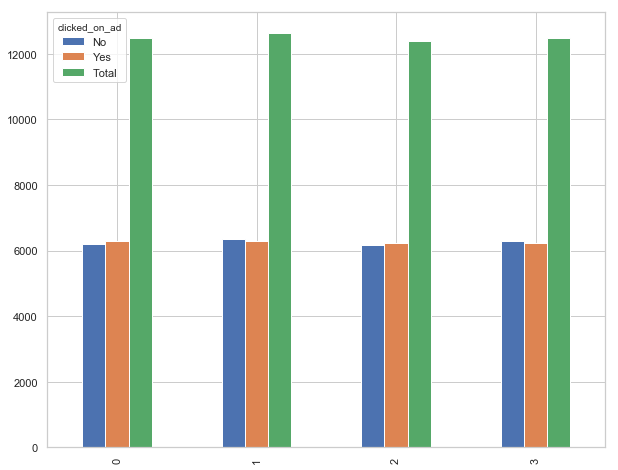

In [81]:
size_click[:4].plot(kind='bar',figsize=(10,8))

# here we can do a simple bar plot from our newly created dataframe
# the [:4] is just so that we don't display the "Total"; try without the [:4] to see why

In [72]:
sns.barplot(x='company_size',y='clicked_on_ad',data=size_click)

ValueError: Could not interpret input 'company_size'

## Why didn't the above code work? Because of our index! Ultimately, it's saying that it can't interpret "company_size" because that is currently being read as the index. 

In [73]:
size_click.reset_index(inplace=True) # so, let's reset our index...

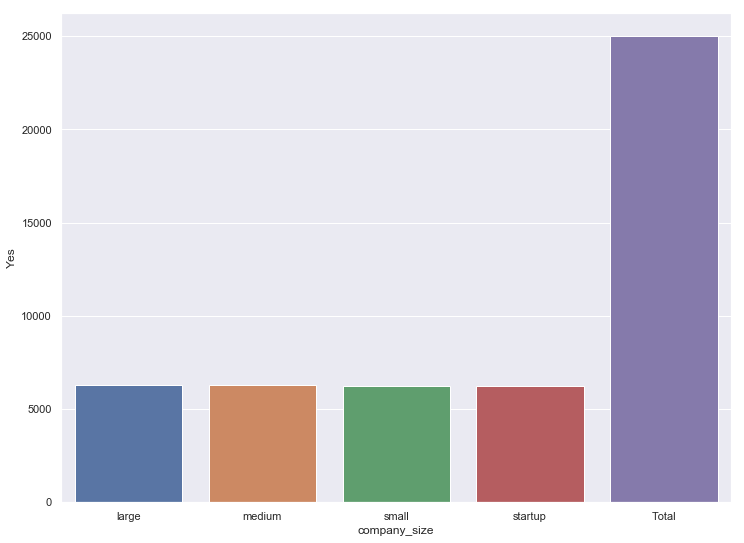

In [85]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(x='company_size',y='Yes',data=size_click) # ...and try again

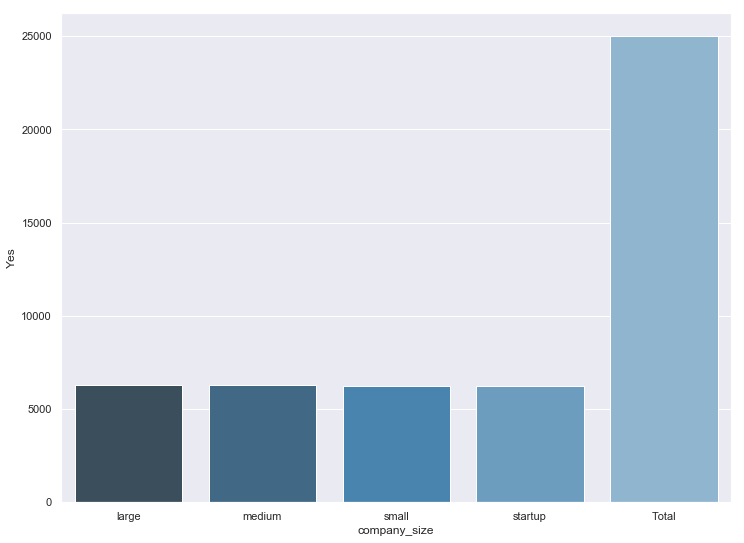

In [90]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(x='company_size',y='Yes',data=size_click,palette="Blues_d") # change the color palette 

## Histograms

Text(0, 0.5, 'Frequency')

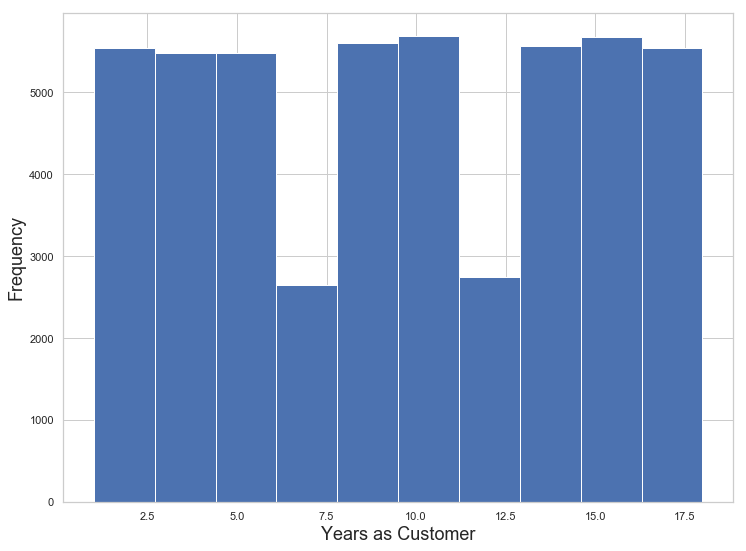

In [79]:
data['years_customer'].hist(bins=10,figsize=(12,9))
plt.xlabel("Years as Customer",fontsize=18)
plt.ylabel("Frequency",fontsize=18)

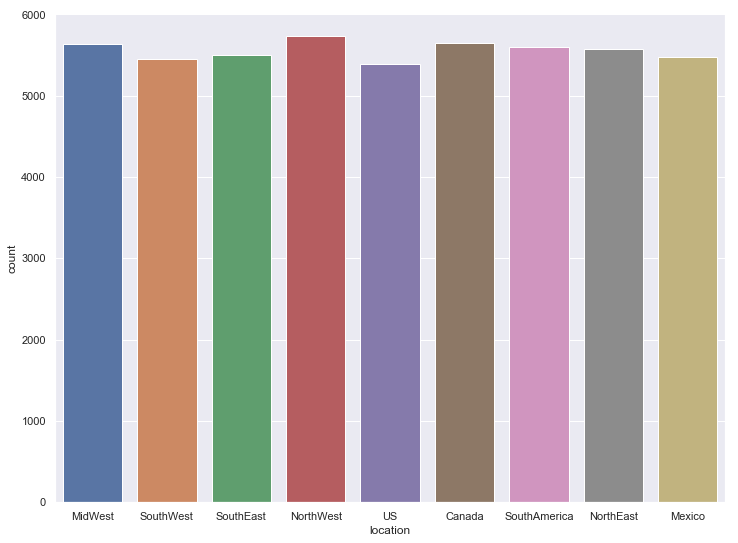

In [24]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(x='location',data=data)

## Scatterplot

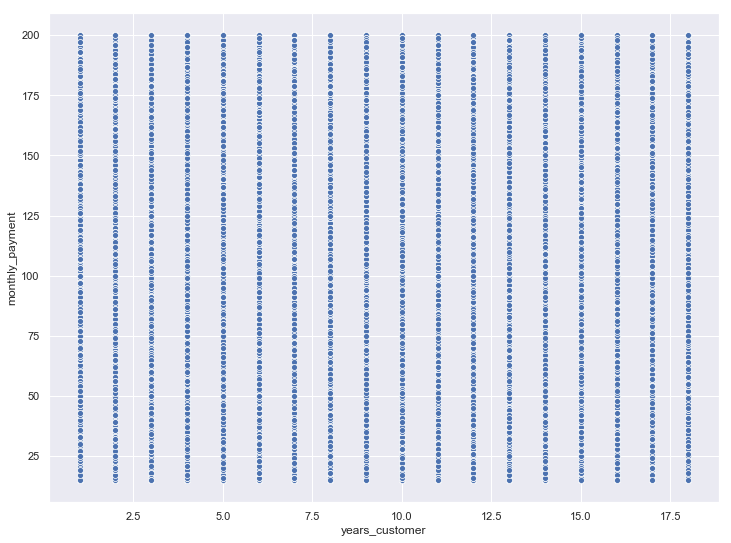

In [95]:
sns.scatterplot(x="years_customer",y="monthly_payment",data=data)

## Density Plot

### *A density plot visualizes the distribution of data over a continuous interval or time period. Unlike histograms, there are no bins and thus it allows for a smoother distribution which let's a viewer more easily see the underlying shape of the distribution.*

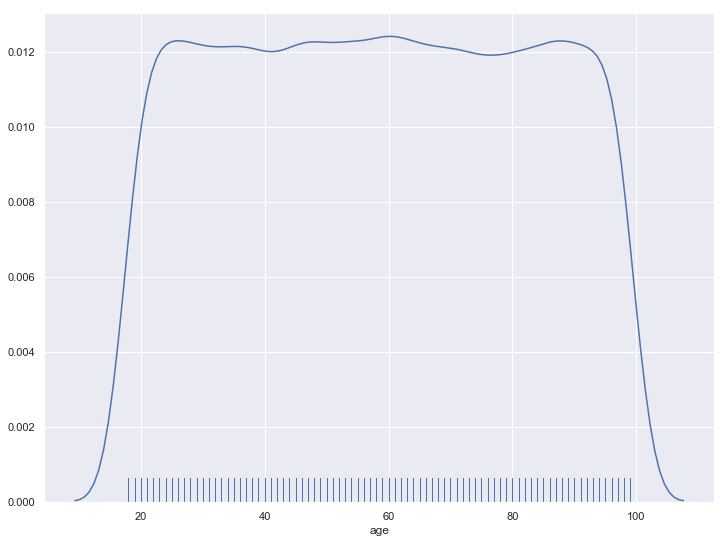

In [26]:
sns.distplot(data['age'], hist=False, rug=True)

## Boxplot

### *A boxplot is a standard method of displaying the distribution of data, highlighting the minimum, first quartile, median, third quartile, and maximum value of a set. It's an excellent resource when you are looking for skew or outliers in your data.*

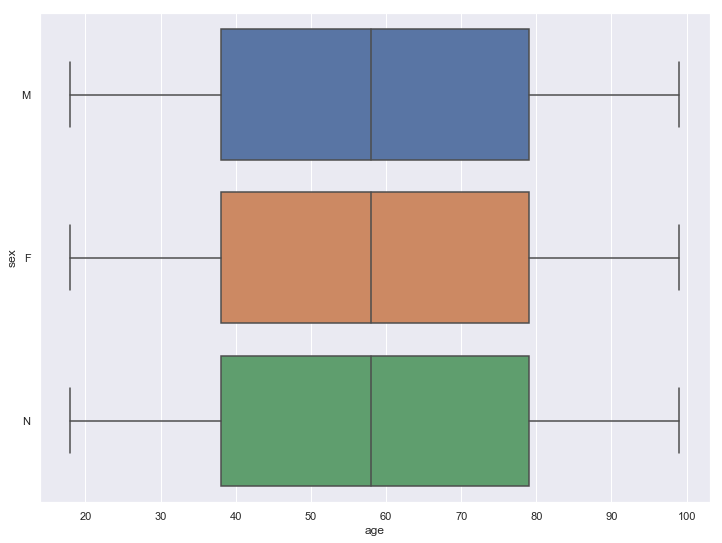

In [28]:
sns.boxplot(x="age", y="sex", data=data)

## Hexagonal Bin Plot

### *Hexagonal binning plots density, rather than individual data points, which can be useful when you have so many data points that a scatterplot becomes unreadable.* 

## Trellis Plot

### *Trellis plots are used with multivariate data as an array of panels with a common set of axes; Ultimately, a Trellis plot allows you to plot each combination of categorical values in a data set against one another.*

## Heatmaps

In [29]:
# size_sex_click = pd.crosstab(data.clicked_on_ad,[data.company_size,data.sex],margins=True,margins_name='Total')
# size_sex_click